In [6]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

mat = loadmat('ex6data2.mat')

X = mat['X']
y = mat['y']

m = len(y)

In [7]:
def plotGraph(X, y):
    X1 = X[np.where(y == 1)[0]]
    X0 = X[np.where(y == 0)[0]]
    
    fig = plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(X1[:,0], X1[:,1],'rx', X0[:,0], X0[:,1], 'yd')
    
    plt.show()
    return

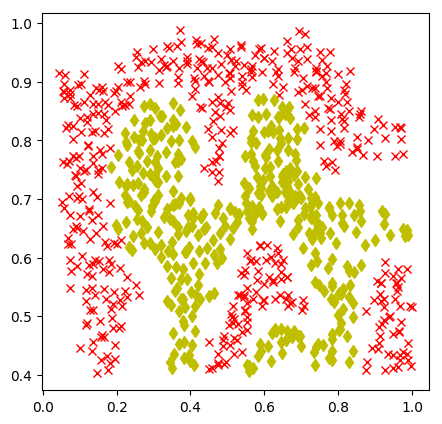

In [8]:
plotGraph(X, y)

In [9]:
def gaussianKernel(x, l, sigma = 0.2):
    x = x.flatten()
    l = l.flatten()
    
    sim = np.exp(- np.sum(np.power((x - l), 2) )/ float( 2*(sigma**2)) )
    
    return sim

In [10]:
def gaussianKernelFMatrix(X1, L):
    
    F_matrix = np.zeros([X1.shape[0],L.shape[0]])
    
    for i, xi in enumerate(X1):
        for j, Lj in enumerate(L):
            F_matrix[i, j] = gaussianKernel(xi, Lj, 0.01)
        
    return F_matrix



In [11]:
F = gaussianKernelFMatrix(X, X)
print(F.shape)

(863, 863)


In [27]:
C = 10  # SVM regularization parameter
 
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y.ravel())
svc_model = svc.fit(X, y.ravel()) 
svc_p = svc_model.predict(X)

# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C)
lin_svc_model = lin_svc.fit(X, y.ravel())
lin_svc_p = lin_svc_model.predict(X)

# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=50.0, C=C)
rbf_svc_model = rbf_svc.fit(X, y.ravel())
rbf_svc_p = rbf_svc_model.predict(X)

# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=6, C=C)
poly_svc_model = poly_svc.fit(X, y.ravel())
poly_svc_p = poly_svc_model.predict(X)

# SVC with custom kernel
#custom_svc = svm.SVC(C = C, kernel="precomputed")
#custom_svc_model = custom_svc.fit( gaussianKernelFMatrix(X,X), y.ravel() )
#p_custom = custom_svc_model.predict(gaussianKernelFMatrix(X,X))        #pass in the form of F matrix (nxm)

#print(custom_svc.predict(X.T).reshape(y.shape[0],1).shape)

print('Training accuracy for SVC model: ' + str((np.sum(svc_p.reshape(m,1)==y))/m*100) + "%")
print('Training accuracy for Linear SVC model: ' + str((np.sum(lin_svc_p.reshape(m,1)==y))/m*100) + "%")
print('Training accuracy for Linear RBF model: ' + str((np.sum(rbf_svc_p.reshape(m,1)==y))/m*100) + "%")
print('Training accuracy for Linear poly model: ' + str((np.sum(poly_svc_p.reshape(m,1)==y))/m*100) + "%")
#print('Training accuracy for custom (guassian) model: ' + str((np.sum(p_custom.reshape(m,1)==y))/m*100) + "%")

Training accuracy for SVC model: 57.010428737%
Training accuracy for Linear SVC model: 53.7659327926%
Training accuracy for Linear RBF model: 99.6523754345%
Training accuracy for Linear poly model: 70.33603708%


In [28]:
# TESTING CELL
print(poly_svc_p.shape)
print(np.sum(poly_svc_p))


print(p_custom.shape)
print(np.sum(p_custom))

(863,)
332
(863,)
480


In [44]:
def plotData(arr, X, f, s, isCustomKernel = False):

    plt.figure(figsize=(6, 4), dpi=100)
    
    ax = plt.subplot(111)
    
    #arr is a stacked array of X, and y shape = 863 x 3
    #plot X(x1,x2) filtered by corresponding value of y 0 or 1
    ax.scatter(arr[arr[:,2]==0][:,0], arr[arr[:,2]==0][:,1], c='r', marker='o', label='Zero')
    ax.scatter(arr[arr[:,2]==1][:,0], arr[arr[:,2]==1][:,1], c='g', marker='+', label='One')

    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if isCustomKernel == True:
        Z = f.predict(gaussianKernelFMatrix(np.c_[xx.ravel(), yy.ravel()], X))        
    else:
        Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
    
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    
    try:
        plt.contour(xx, yy, (Z))
    except ValueError:  #raised if `y` is empty.
        pass
    
    plt.xlim(np.min(arr[:,0]), np.max(arr[:,0]))
    plt.ylim(np.min(arr[:,1]), np.max(arr[:,1]))
    
    plt.title(s)
    
    #plt.title(s)
    plt.show()
    
    return Z

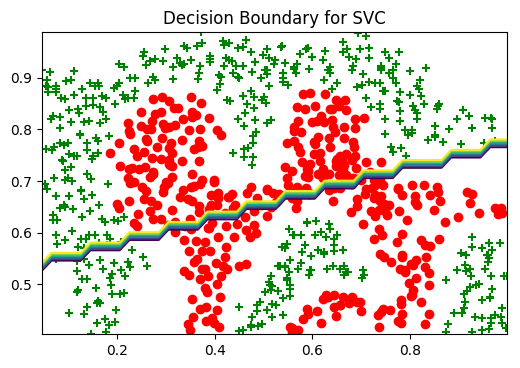

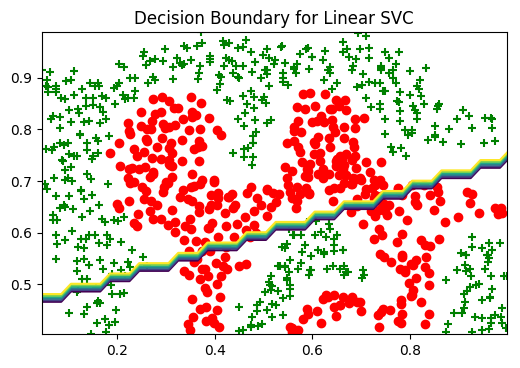

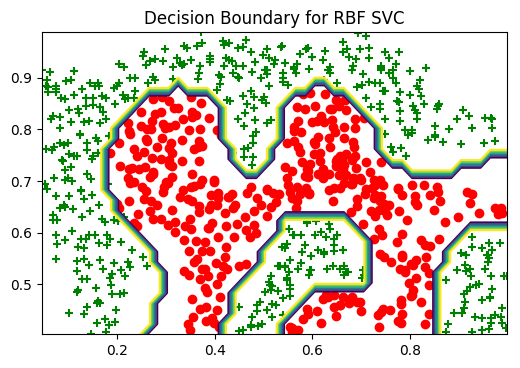

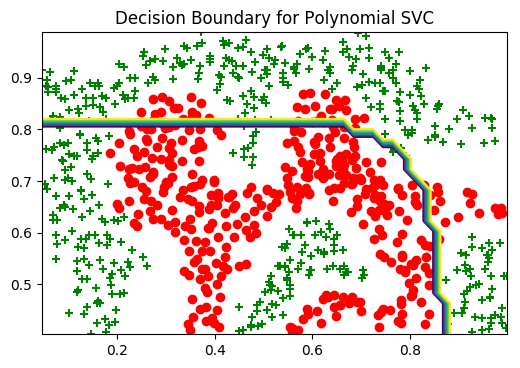

In [45]:
combinedXy = np.hstack((X,y))

Z_svc = plotData(combinedXy, X, svc_model, 'Decision Boundary for SVC')
Z_linear = plotData(combinedXy, X, lin_svc_model, 'Decision Boundary for Linear SVC')
Z_rbf = plotData(combinedXy, X, rbf_svc_model, 'Decision Boundary for RBF SVC')
Z_poly = plotData(combinedXy, X, poly_svc_model, 'Decision Boundary for Polynomial SVC')
#Z_guassian = plotData(combinedXy, X, custom_svc_model, 'Decision Boundary for Custom Guassian Kernel', isCustomKernel=True)


In [18]:
print(Z_guassian.shape)
print(np.sum(Z_guassian==1))

(130, 148)
18742
